# Setup

In [1]:
# Imports
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, TweetTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import string
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
!pip install unidecode
from unidecode import unidecode
# pip install Counter
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
from sklearn.decomposition import TruncatedSVD
import csv
from sklearn.mixture import GaussianMixture
import math

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 235 kB 7.1 MB/s 


In [2]:
root = 'Data/'

In [3]:
# Decompress files and concatenate to datframe
filenames = ['UkraineCombinedTweetsDeduped_FEB27.csv.gzip',
             'UkraineCombinedTweetsDeduped_FEB28_part1.csv.gzip',
             'UkraineCombinedTweetsDeduped_FEB28_part2.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR01.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR02.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR03.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR04.csv.gzip',
             'UkraineCombinedTweetsDeduped_MAR05.csv.gzip']
  
li = []

for filename in filenames:
    df = pd.read_csv(root + filename, 
                     index_col=None, 
                     header=0,
                     compression='gzip')
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

FileNotFoundError: ignored

In [7]:
# Read data directly in from cleaned file as series, comment out to run through altogether
file = open(root + 'cleaned_tokenized_data.csv', 'r', encoding='utf-8')
csv_reader = csv.reader(file)
tokenized_text = []
for row in csv_reader:
    tokenized_text.append(row)
file.close()
    
tokenized_text = pd.Series(tokenized_text)

FileNotFoundError: ignored

# EDA

In [ ]:
# Description of data
data.describe()

,Unnamed: 0,userid,following,followers,totaltweets,tweetid,retweetcount,favorite_count
count,2.984341e+06,2.984341e+06,2.984341e+06,2.984341e+06,2.984341e+06,2.984341e+06,2.984341e+06,2.984341e+06
mean,1.254493e+06,6.544810e+17,1.516803e+03,1.465476e+04,4.792329e+04,1.499086e+18,1.135635e+03,3.052114e-01
std,6.314264e+05,6.372407e+17,5.747575e+03,3.219711e+05,1.202163e+05,7.435979e+14,6.627876e+03,6.141111e+01
min,0.000000e+00,2.210000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.497725e+18,0.000000e+00,0.000000e+00
25%,7.619750e+05,5.428402e+08,1.180000e+02,4.200000e+01,1.161000e+03,1.498459e+18,1.000000e+00,0.000000e+00
50%,1.324930e+06,7.894661e+17,4.550000e+02,2.600000e+02,8.852000e+03,1.499114e+18,2.100000e+01,0.000000e+00
75%,1.697973e+06,1.312006e+18,1.446000e+03,1.181000e+03,4.166300e+04,1.499762e+18,2.630000e+02,0.000000e+00
max,2.405426e+06,1.500258e+18,1.422017e+06,5.201331e+07,4.249883e+06,1.500259e+18,1.468680e+05,4.271000e+04


In [ ]:
# WordCloud
wordcloud = WordCloud(background_color = 'white',
                      max_words = 500,
                      max_font_size = 60,
                      random_state = 42
                      ).generate(str(tokenized_text))
print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.rcParams["figure.figsize"] = [5,5]
plt.show()

In [ ]:
# Function to find most popular hashtags
def find_hashtags(tweets):
  lst = []
  tweet = eval(str(tweets))
  for i in tweet:
    lst.append((str(unidecode(i['text'])).lower()))
    lst = list(set(lst))
  return lst

In [ ]:
# Make list of most popular hashtags
hashtags_drop = ['SlavaUkraini','Russia','RussiaUkraineWar','Putin','RussiaUkraine', 'RussianWar', 'ww3', 'moscow', 'RussianConflict', 'ukraineunderattack', 'Ukriane', 'Ukraine', 'RussianUkrainianWar', 'UkraineRussia', 'UkraineConflict', 'UkraineWar', 'Kharkiv', 'StopPutinNow']
hashtags_drop = [x.lower() for x in hashtags_drop]
hashtags = []
hashtag_list = data['hashtags'].apply(find_hashtags)

for hashtag in hashtag_list:
  for h in hashtag:
    if h not in hashtags_drop:
      hashtags.append(h)

In [ ]:
# Make a dataframe of top 25 hashtags
top_hashtags = 25
count = Counter(hashtags)
top_hashtags_lst = count.most_common(top_hashtags)

hashtags_df = pd.DataFrame(top_hashtags_lst)
hashtags_df.columns = ['Hashtags', 'Tweets']
# hashtags_df 

<AxesSubplot:xlabel='Hashtags'>

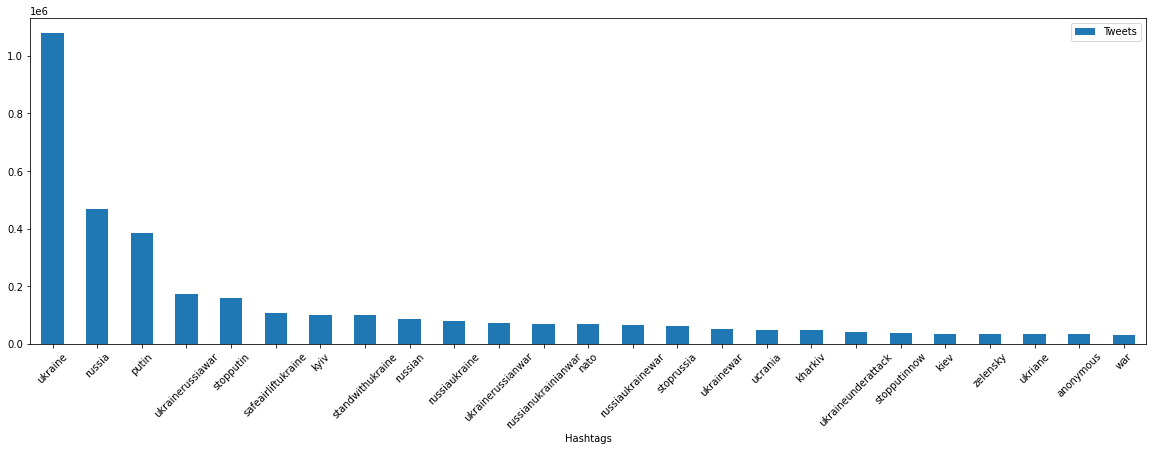

In [ ]:
# Plot top 25 most used hashtags
plt.rcParams["figure.figsize"] = [20,6]
hashtags_df.plot.bar(x='Hashtags', y='Tweets', rot=45)

# Clustering

In [ ]:
# TF-IDF of tokenized words

# Functiond that takes tokenized lists and returns them as a string for vectorizer 
def identity_tokenizer(text):
  return text

vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, 
                             stop_words=stopwords.words('english'),
                             lowercase=False,
                             max_features=10000)
X = vectorizer.fit_transform(tokenized_text)
print(vectorizer.get_feature_names()) # subset of 10000

C:\Users\evano\miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'", 'b', 'c', 'e', 'f', 'g', 'h', 'j', 'l', 'n', 'p', 'r', 'u', 'v', 'w'] not in stop_words.
  warnings.warn(


['#abolishnato', '#abramovich', '#actnow', '#ad', '#ada', '#adolfputin', '#adwa', '#aeroflot', '#afganistan', '#afghan', '#afghanistan', '#afp', '#africa', '#african', '#africaninukraine', '#africans', '#africansinukraine', '#againstthewest', '#aggression', '#ai', '#aid', '#airbnb', '#airdrop', '#airdropalert', '#airforce', '#airindia', '#airspace', '#albania', '#alcohol', '#aleppo', '#allies', '#alllivesmatter', '#amazon', '#amd', '#america', '#americafirst', '#americalast', '#american', '#americans', '#amsterdam', '#an', '#animal', '#animalrescue', '#animals', '#animalsofukraine', '#anonymous', '#anonymousukraine', '#anonymus', '#antifa', '#antiwar', '#antonov', '#apartheidisrael', '#apple', '#architecture', '#armageddon', '#armenia', '#armenian', '#army', '#arnabgoswami', '#art', '#artist', '#artsakh', '#artwork', '#ashtonkutcher', '#ashwednesday', '#asia', '#assad', '#asuustrike', '#attack', '#atw', '#auspol', '#australia', '#austria', '#avax', '#avgeek', '#aviation', '#azerbaijan'

C:\Users\evano\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
truncSVD = TruncatedSVD(n_components=100, random_state=0)
X_reduced = truncSVD.fit_transform(X)

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters


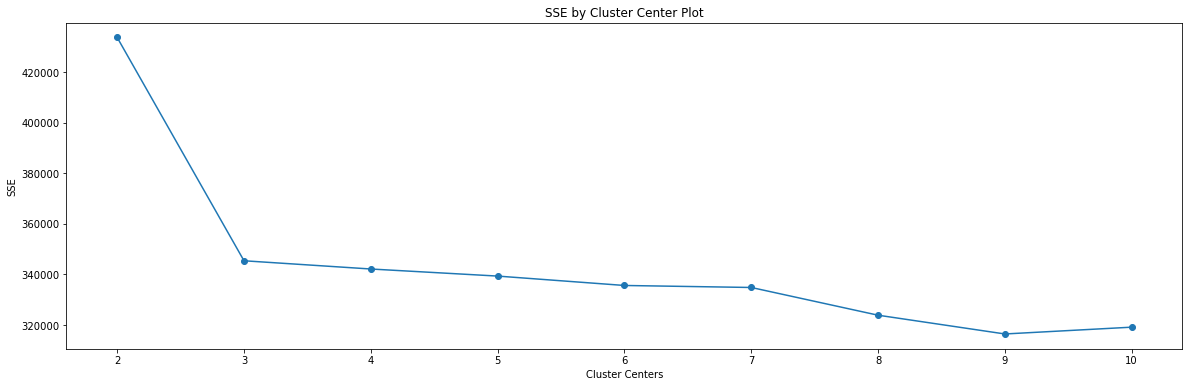

In [ ]:
random_state = 20

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=random_state).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(X_reduced, 10)

In [ ]:
# kMeans cluster on optimal number of clusters
n_clusters = 3
clusters = MiniBatchKMeans(n_clusters=n_clusters, init_size=1024, batch_size=2048, random_state=random_state).fit_predict(X_reduced)

In [ ]:
# Print percent of data in each cluster
print(len(clusters[clusters == 0]) / len(clusters))
print(len(clusters[clusters == 1]) / len(clusters))
print(len(clusters[clusters == 2]) / len(clusters))

0.9281930145344051
0.019177686963587272
0.052629298502007635


C:\Users\evano\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\evano\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


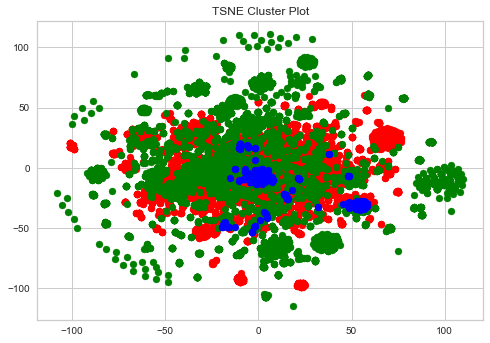

In [ ]:
# PCA and TSNE Plots
def plot_tsne_pca(data, labels, size, percents):
    
    # Generate reduced size  dataset
    data_subset = data[labels == 0][:int(size * percents[0])]
    data_subset = np.concatenate((data_subset, data[labels == 1][:int(size * percents[1])]))
    data_subset = np.concatenate((data_subset, data[labels == 2][:int(size * percents[2])]))
    labels_subset = labels[labels == 0][:int(size * percents[0])]
    labels_subset = np.concatenate((labels_subset, labels[labels == 1][:int(size * percents[1])]))
    labels_subset = np.concatenate((labels_subset, labels[labels == 2][:int(size * percents[2])])) 

    tsne = TSNE().fit_transform(data_subset)
    
    plt.scatter(tsne[:, 0][labels_subset == 0], tsne[:, 1][labels_subset == 0], c='red')
    plt.scatter(tsne[:, 0][labels_subset == 1], tsne[:, 1][labels_subset == 1], c='green')
    plt.scatter(tsne[:, 0][labels_subset == 2], tsne[:, 1][labels_subset == 2], c='blue')
    plt.title('TSNE Cluster Plot')

# plot_tsne_pca(X_reduced, clusters, 10000, [0.92, 0.03, 0.05])
plot_tsne_pca(X_reduced, gm, 10000, [0.47, 0.49, 0.04])

In [ ]:
# Compute sum of tf-idf values for each cluster
cluster_tfidf_avgs = np.zeros(shape=(n_clusters, 10000))
for i in range(len(clusters)):
    cluster_tfidf_avgs[clusters[i], :] = cluster_tfidf_avgs[clusters[i], :] + X.getrow(i).toarray()

# Compute average of tf-idf values for each cluster
for i in range(n_clusters):
    cluster_tfidf_avgs = cluster_tfidf_avgs / len(clusters[clusters == i])
    
# Print top words in each cluster
n_terms = 20
for i in range(n_clusters):
    print('Cluster ' + str(i) + ':')
    print(str([vectorizer.get_feature_names()[ind] for ind in np.argsort(cluster_tfidf_avgs[i])[-n_terms:]]) + '\n')

Cluster 0:
['one', '#ukrainerussianwar', '#russianukrainianwar', 'country', 'support', '#russian', 'wa', '#kyiv', '#standwithukraine', 'world', 'putin', 'amp', 'ha', 'russia', 'people', 'ukrainian', '#ukrainerussiawar', 'war', 'ukraine', 'russian']

Cluster 1:


C:\Users\evano\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['#noflyzoneua', '#stoprussianaggression', 'noflyzoneua', 'child', 'amp', 'killing', 'help', '#europe', 'ukraine', 'russian', 'stop', 'russia', '#stopputin', 'aggression', '#stoprussia', 'close', 'security', 'sky', 'council', 'exclude']

Cluster 2:
['nato', 'plant', 'around', 'close', 'ask', 'airspace', 'shoot', 'ukraine', '#stopputin', 'stop', 'need', 'civilian', 'weapon', 'humanitarian', 'defend', 'provide', 'death', 'innocent', 'assistance', '#safeairliftukraine']



In [ ]:
# Fit gaussian mixture
gm = GaussianMixture(n_components=3, random_state=0).fit_predict(X_reduced)

In [ ]:
# Print percent of data in each label
print(len(gm[gm == 0]) / len(gm))
print(len(gm[gm == 1]) / len(gm))
print(len(gm[gm == 2]) / len(gm))

0.4712423901202951
0.490381336341518
0.0383762735381869


In [ ]:
# Compute sum, then average of tf-idf values for each cluster
mixture_tfidf_avgs = np.zeros(shape=(n_clusters, 10000))

for i in range(len(clusters)):
    mixture_tfidf_avgs[gm[i], :] = mixture_tfidf_avgs[gm[i], :] + X.getrow(i).toarray()
    
for i in range(n_clusters):
    mixture_tfidf_avgs = mixture_tfidf_avgs / len(gm[gm == i])

# Print top terms for each mixture
n_terms = 20
for i in range(n_clusters):
    print('Mixture ' + str(i) + ':')
    print(str([vectorizer.get_feature_names()[ind] for ind in np.argsort(mixture_tfidf_avgs[i])[-n_terms:]]) + '\n')

Mixture 0:
['#russian', '#russiaukrainewar', '#kyiv', 'ukrainian', '#standwithukraine', 'support', 'like', 'country', 'world', '#ukrainerussianwar', 'russian', 'amp', 'putin', '#russianukrainianwar', 'ha', 'people', 'russia', 'ukraine', 'war', '#ukrainerussiawar']

Mixture 1:


C:\Users\evano\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['war', 'help', 'force', 'people', 'wa', 'ukrainian', 'russian', '#stopputin', 'stop', 'death', 'innocent', 'assistance', 'humanitarian', 'provide', 'defend', '#safeairliftukraine', 'need', 'weapon', 'civilian', 'ukraine']

Mixture 2:
['store', '#stoprussianaggression', '#standwithukraine', 'child', 'killing', 'amp', 'help', '#europe', 'ukraine', 'russian', 'stop', 'russia', '#stopputin', 'aggression', '#stoprussia', 'security', 'close', 'council', 'sky', 'exclude']



# Model Evaluation

In [ ]:
# Generate word-score dictionaries
words = vectorizer.get_feature_names()
# dict_0 = dict(zip([words[i] for i in (-mixture_tfidf_avgs[0]).argsort().tolist()],
#              -np.sort(-mixture_tfidf_avgs[0])))
# dict_1 = dict(zip([words[i] for i in (-mixture_tfidf_avgs[1]).argsort().tolist()],
#              -np.sort(-mixture_tfidf_avgs[1])))
# dict_2 = dict(zip([words[i] for i in (-mixture_tfidf_avgs[2]).argsort().tolist()],
#              -np.sort(-mixture_tfidf_avgs[2])))
dict_0 = dict(zip([words[i] for i in (-cluster_tfidf_avgs[0]).argsort().tolist()],
             -np.sort(-cluster_tfidf_avgs[0])))
dict_1 = dict(zip([words[i] for i in (-cluster_tfidf_avgs[1]).argsort().tolist()],
             -np.sort(-cluster_tfidf_avgs[1])))
dict_2 = dict(zip([words[i] for i in (-cluster_tfidf_avgs[2]).argsort().tolist()],
             -np.sort(-cluster_tfidf_avgs[2])))

# Working around NaN issue with Wordcloud function
for key in dict_0:
    if dict_0[key] == 0:
        dict_0[key] = float(0)
     
for key in dict_1:
    if dict_1[key] == 0:
        dict_1[key] = float(0)

for key in dict_2:
    if dict_2[key] == 0:
        dict_2[key] = float(0)

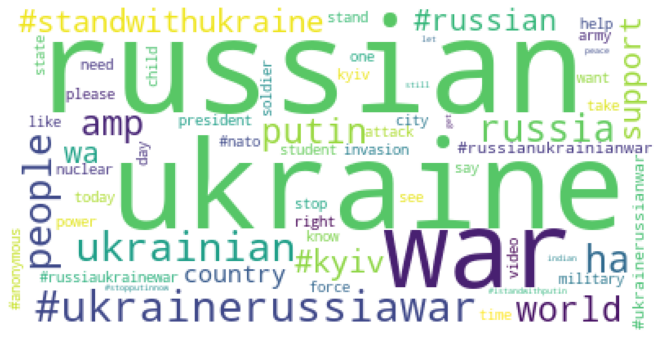

In [ ]:
# Generate worclouds for each cluster/label
wordcloud = WordCloud(background_color = 'white',
                      max_words = 60,
                      max_font_size = 80,
                      random_state = 42
                      ).fit_words(dict_0)
plt.axis('off')

# plt.rcParams["figure.figsize"] = (10,8)

plt.imshow(wordcloud)
plt.show()



In [ ]:
# Silhouette score, Pairwise F1, Purity 

In [ ]:
# Compute kMeans silhouette score
from sklearn.metrics import silhouette_score
kmeans_sil_score = silhouette_score(X_reduced, clusters, metric='euclidean', random_state=0)

KeyboardInterrupt: 

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = MiniBatchKMeans(n_clusters=n_clusters, init_size=1024, batch_size=2048, random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_reduced)
visualizer.show()

KeyboardInterrupt: 

In [ ]:
# Write output file
pd.DataFrame(clusters).to_csv(root + 'kMeans_cluster_labels.csv')